# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [ ]:
# Verificando tipos de dados
print(df.info())


# Corrigindo possíveis problemas
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Number of Children'] = pd.to_numeric(df['Number of Children'], errors='coerce')

# Transformando variáveis categóricas em string
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
df[categorical_columns] = df[categorical_columns].astype(str)

# Verificando tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null 

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [ ]:
# Verificar dados faltantes
print("Dados faltantes antes de remover:")
print(df.isnull().sum())

# Remover linhas com valores ausentes na coluna 'Age'
df = df.dropna(subset=['Age'])

# Verificar novamente
print("Dados faltantes após remoção:")
print(df.isnull().sum())

Dados faltantes antes de remover:
Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Dados faltantes após remoção:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


Com base na análise dos valores ausentes, decidi como tratar cada caso. Aqui está o meu raciocínio para as colunas:

- **Age**: Contém valores faltantes. Como idade é uma variável contínua e crucial para análises, escolhi substituir os valores ausentes pela **média** ou **mediana** para evitar perda de informações.
- **Outras colunas**: Não possuem valores ausentes e não precisam de tratamento adicional.

Optei por substituir os valores faltantes de **Age** pela **mediana** porque:

- A mediana é menos sensível a outliers do que a média.
- Isso mantém a distribuição da variável consistente.


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [ ]:
# Listar valores únicos nas variáveis categóricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
for column in categorical_columns:
    print(f"Valores únicos em {column}:")
    print(df[column].unique())
    print()


Valores únicos em Gender:
['Female' 'Male']

Valores únicos em Education:
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Valores únicos em Marital Status:
['Single' 'Married']

Valores únicos em Home Ownership:
['Rented' 'Owned']

Valores únicos em Credit Score:
['High' 'Average' 'Low']



- **Gender**: Apenas duas categorias ("Female" e "Male"), que estão corretas.  
- **Education**: As opções são coerentes e estão bem definidas.  
- **Marital Status**: As categorias estão corretas ("Single" e "Married").  
- **Home Ownership**: As categorias "Rented" e "Owned" estão corretas.  
- **Credit Score**: As categorias "High", "Average" e "Low" são válidas.  

Com base nisso, não vejo necessidade de realizar modificações nas variáveis categóricas. Os dados estão bem estruturados para análise.


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

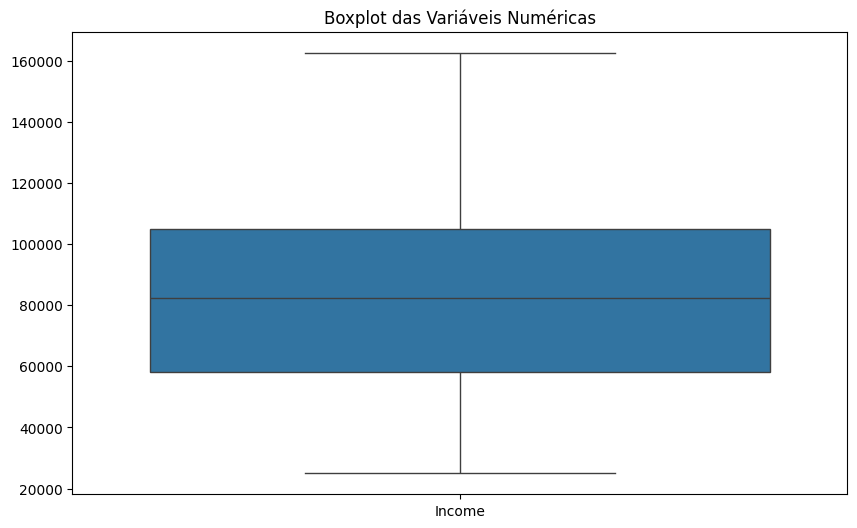

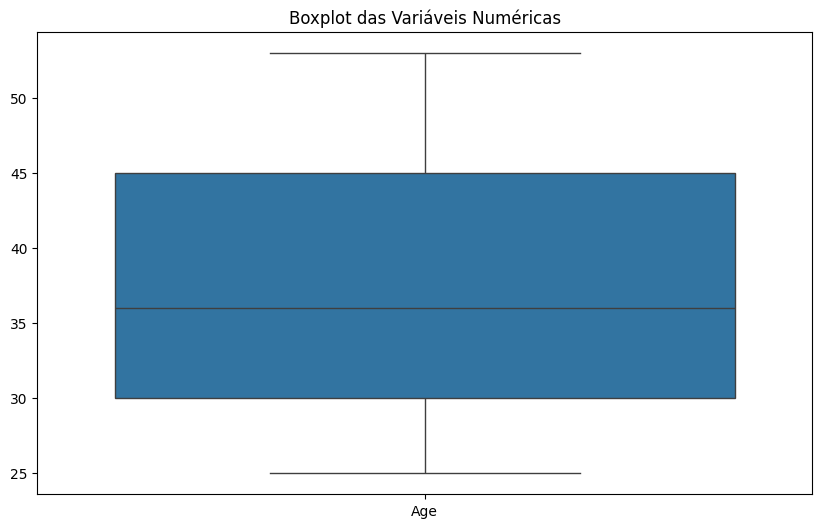

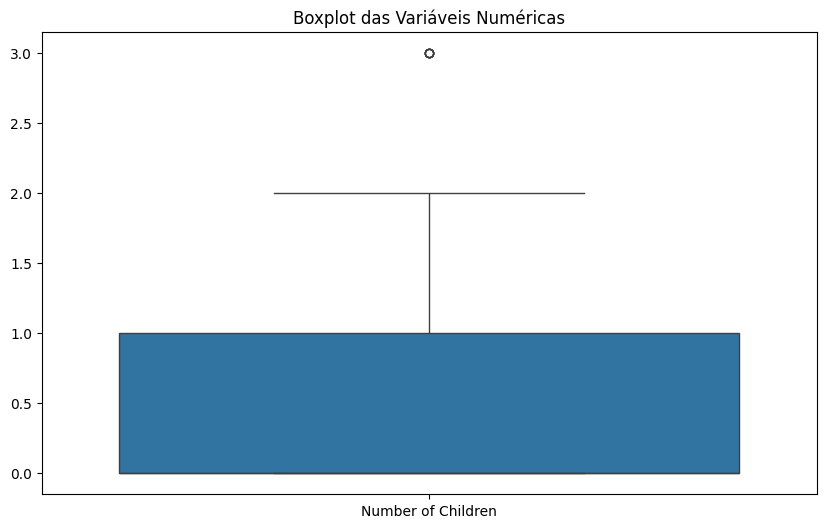

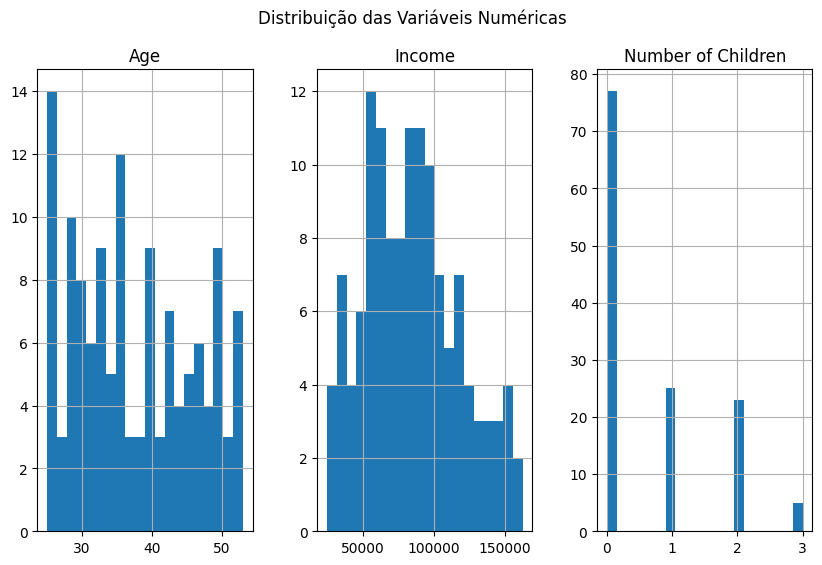

In [ ]:
df.describe()

# Criando boxplots para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Income']])
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', ]])
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Number of Children']])
plt.title('Boxplot das Variáveis Numéricas')
plt.show()


# Criando histogramas para visualizar a distribuição dos dados
df[['Age', 'Income', 'Number of Children']].hist(bins=20, figsize=(10, 6), layout=(1, 3))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

### Análise Univariada:

#### **Idade ("Age"):**
- **Distribuição Após o Drop**: Após remover as linhas com valores ausentes, a distribuição da idade está mais equilibrada entre as diferentes faixas etárias, sem a concentração extrema na faixa dos 35 anos.  
- **Observação Importante**: Se os valores ausentes tivessem sido preenchidos (por exemplo, com a mediana), a concentração em 35 anos poderia ter sido reforçada, distorcendo a análise. Dropar os valores ausentes foi uma decisão que preserva a integridade da análise, especialmente considerando a diversidade de idades na amostra.

#### **Renda ("Income"):**
- A variável continua apresentando uma distribuição próxima do normal, mas com maior concentração nas faixas de renda mais baixas.  
- Esse padrão sugere um perfil econômico predominante de menor poder aquisitivo, o que é comum em muitas populações.

#### **Número de Filhos ("Number of Children"):**
- A maioria das pessoas não tem filhos, com quase 100 indivíduos nessa categoria, destacando essa característica marcante do grupo.  
- Poucas pessoas possuem 1 ou 2 filhos (menos de 15 em cada categoria), e uma pequena fração tem 3 ou mais filhos, indicando uma tendência demográfica de famílias menores.


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

<ipython-input-71-680d1de8d049>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
<ipython-input-71-680d1de8d049>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
<ipython-input-71-680d1de8d049>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
<ipython-input-71-680d1de8d049>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

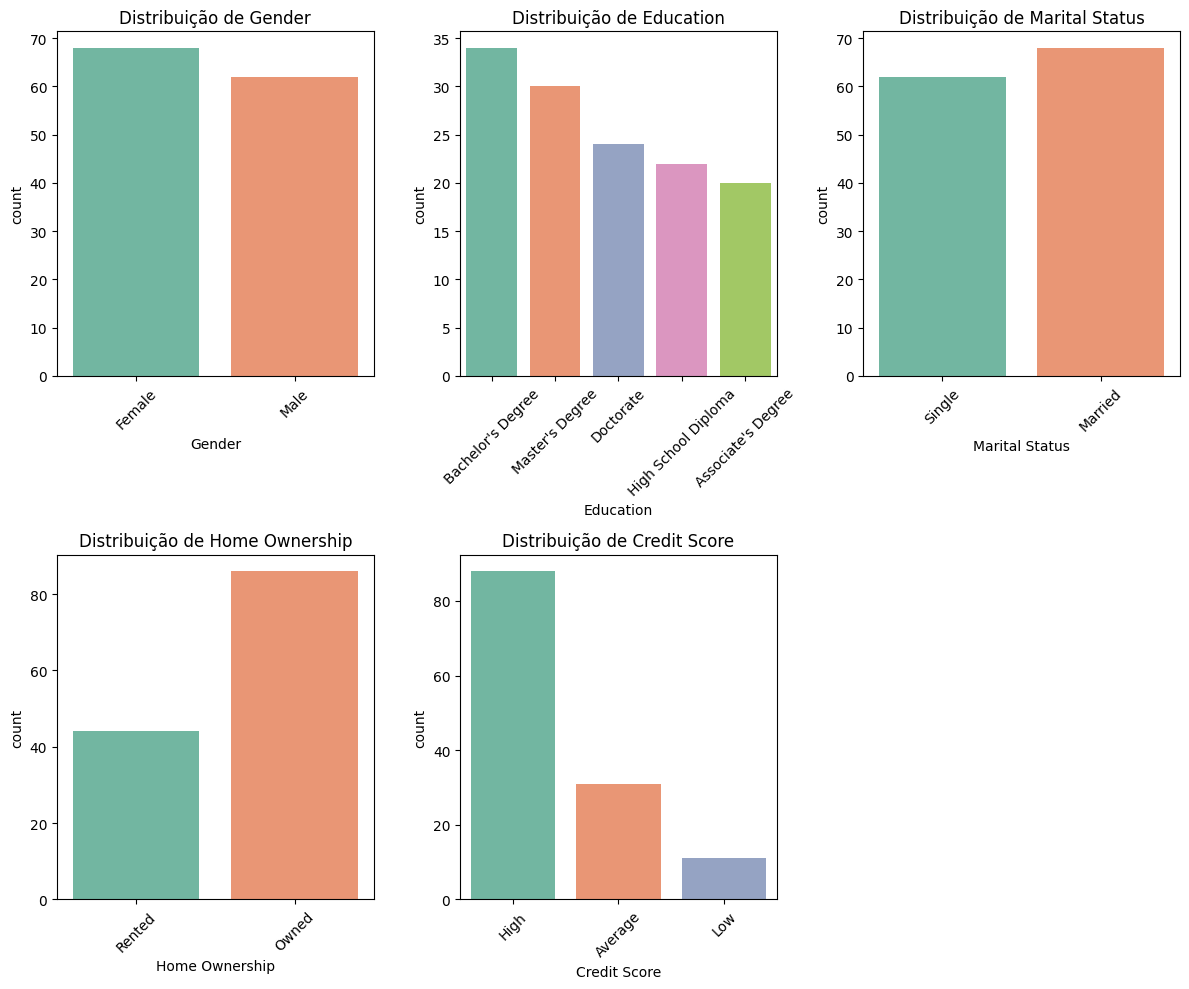

In [ ]:
# Plotando gráficos de barras para cada variável categórica
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

plt.figure(figsize=(12, 10))

# Gerar o gráfico para cada variável categórica
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, palette="Set2")
    plt.title(f'Distribuição de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Análise Univariada:

#### **Gender (Gênero):**
- A distribuição entre "Female" e "Male" está equilibrada, garantindo uma representação justa de ambos os gêneros.  
- Isso é positivo, pois reduz viés de gênero nas observações e torna as análises mais confiáveis.

#### **Education (Nível de Escolaridade):**
- A quantidade de indivíduos diminui conforme o grau de escolaridade aumenta, o que é esperado, já que poucas pessoas alcançam níveis como doutorado.  
- Esse padrão reflete o perfil educacional geral da população e não indica problemas nos dados.  
- É interessante observar possíveis associações, como se níveis mais altos de educação estão ligados a maior renda ou maior chance de possuir uma casa.

#### **Home Ownership (Propriedade da Casa):**
- A predominância de pessoas que possuem a casa ("Owned") em comparação às que alugam ("Rented") pode indicar maior estabilidade financeira na amostra.  
- Alternativamente, isso pode refletir características específicas da população, como acesso facilitado ao crédito imobiliário.

#### **Credit Score (Pontuação de Crédito):**
- A maioria dos indivíduos possui um "High" (alto) crédito, o que sinaliza boa saúde financeira.  
- A categoria "Médio" (Average) tem uma quantidade considerável de pessoas, enquanto "Low" (baixo) possui bem menos indivíduos.  
- Esses dados sugerem uma população com bom potencial de crédito, com poucos casos de maior risco financeiro.  
- Notas padronizadas ajudam na análise:
  - **High**: Acima de 100, indicando boa pontuação.  
  - **Average**: Por volta de 40, intermediária.  
  - **Low**: Aproximadamente 20, sinalizando dificuldades financeiras e maior risco de inadimplência.


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [ ]:
#seu código aqui

### Análise de Outliers na Variável "Número de Filhos"

Durante a análise univariada da variável "Número de Filhos", identifiquei que a distribuição dos dados apresenta alguns valores que se distanciam consideravelmente da maioria das observações. Esses valores foram classificados como outliers ao analisar o gráfico de boxplot. No entanto, decidi mantê-los na análise por duas razões principais:

#### **1. Natureza dos Dados:**
- O "Número de Filhos" é uma variável de contagem e, naturalmente, pode apresentar valores elevados em algumas observações.  
- Em contextos sociais, é comum encontrar famílias com números variados de filhos, incluindo casos de famílias com um número consideravelmente maior.  
- Esses casos refletem realidades válidas da população estudada e não devem ser descartados sem uma análise mais aprofundada.

#### **2. Impacto nas Análises Subsequentes:**
- Os outliers representam uma pequena parcela do total de observações e, portanto, não têm um impacto significativo na distribuição geral dos dados.  
- Removê-los poderia reduzir a variabilidade do conjunto de dados, comprometendo sua representatividade.  
- Além disso, técnicas de modelagem mais robustas podem ser aplicadas para evitar que esses outliers distorçam as conclusões das análises.

Com isso, optei por manter os outliers, considerando-os como dados válidos que representam situações reais dentro do contexto da análise.


**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



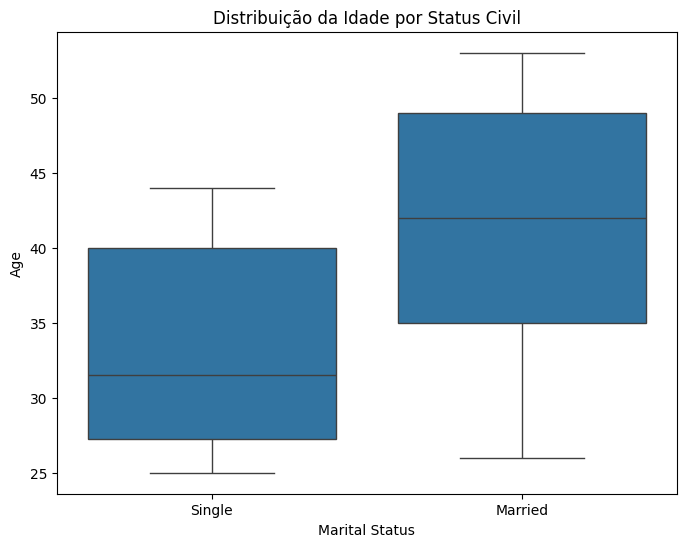

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital Status', y='Age', data=df)
plt.title('Distribuição da Idade por Status Civil')
plt.show()

### 1. Pessoas mais velhas tendem a ser casadas

A análise entre idade e status civil mostra que, com o aumento da idade, há uma tendência de maior proporção de pessoas casadas. Isso sugere que:

- **Tendência ao Casamento com o Tempo:** Com o passar dos anos, mais pessoas se casam, indicando que o casamento é uma etapa comum ao longo da vida.  
- **Valorização Social em Idades Mais Avançadas:** Em muitas sociedades, o casamento é mais valorizado ou esperado em idades mais avançadas, o que pode explicar a maior concentração de pessoas mais velhas no grupo casado.  
- **Reflexo de Padrões Culturais:** Esse padrão pode estar ligado a normas culturais ou sociais que permanecem consistentes ao longo das gerações.  

Essas observações ajudam a entender como idade e status civil estão interligados em um contexto social mais amplo.


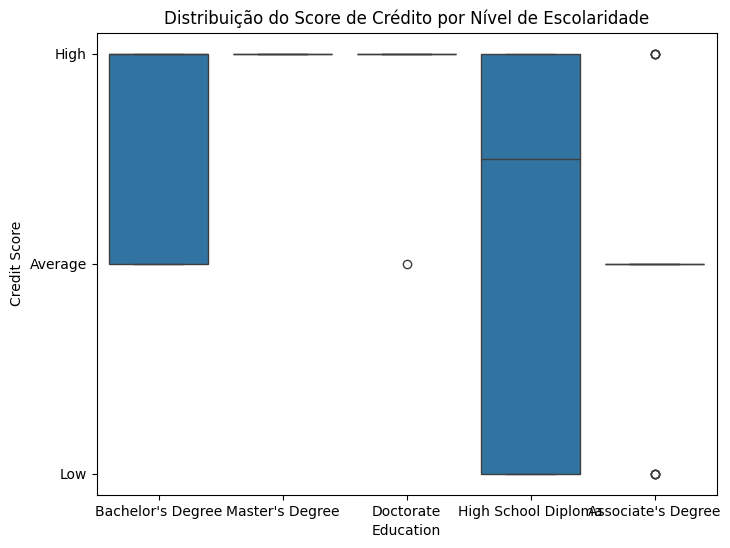

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Credit Score', data=df)
plt.title('Distribuição do Score de Crédito por Nível de Escolaridade')
plt.show()

### 2. Quanto maior a escolaridade, mais tende ao score ser mais alto

A análise entre nível de escolaridade e score de crédito revela que:

- **Tendência de Score Mais Alto com Maior Escolaridade:** Indivíduos com maior nível educacional, como Mestrado e Doutorado, apresentam uma tendência a possuir scores de crédito mais altos.  
- **Impacto Positivo da Educação:** Essa relação sugere que a educação pode influenciar positivamente o comportamento financeiro e a capacidade de obter crédito.  

Esse insight é valioso para empresas que oferecem crédito ou empréstimos, pois indica que níveis mais altos de educação podem estar associados a uma maior probabilidade de bons históricos financeiros e capacidade de pagamento.


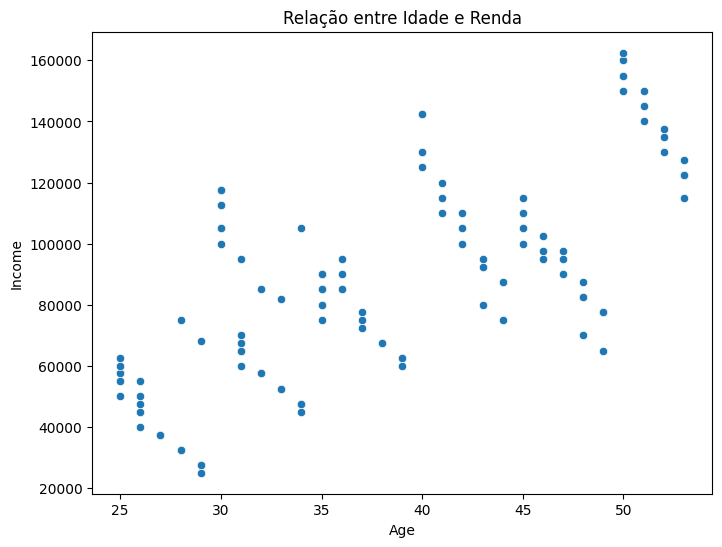

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Relação entre Idade e Renda')
plt.show()

### 3. Quanto maior a idade, maior o income

A relação entre idade e renda revela que:

- **Tendência de Aumento de Renda com a Idade:** Em média, pessoas mais velhas apresentam rendimentos mais elevados.  
- **Progresso na Carreira:** Esse padrão é esperado, já que, ao longo da vida profissional, as pessoas tendem a avançar em suas carreiras, resultando em maiores salários.  
- **Valorização da Experiência:** A experiência adquirida ao longo dos anos é um fator frequentemente valorizado no mercado de trabalho, contribuindo para rendas mais altas em idades mais avançadas.


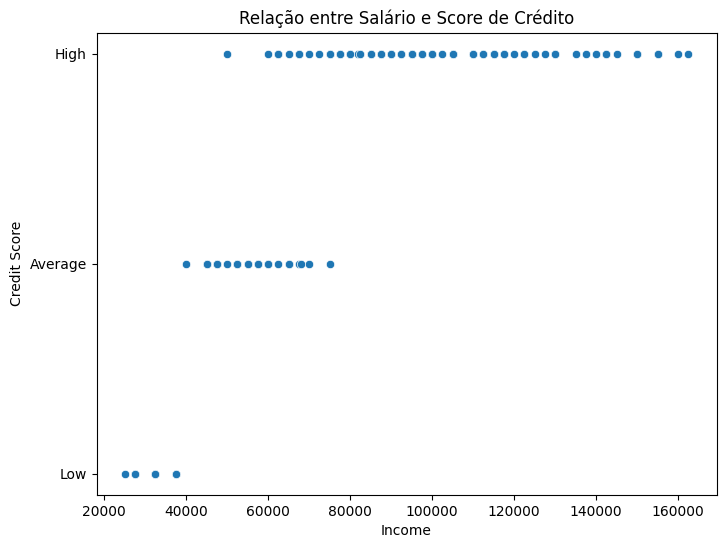

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Credit Score', data=df)
plt.title('Relação entre Salário e Score de Crédito')
plt.show()

### 4. Quanto maior o salário, maior o score

A análise entre salário e score de crédito mostra que:

- **Correlação Positiva:** Pessoas com salários mais altos tendem a ter um score de crédito mais elevado.
- **Capacidade de Pagar Dívidas:** Uma maior renda proporciona maior capacidade de pagar dívidas, o que resulta em um histórico de crédito mais positivo.
- **Implicações para Instituições Financeiras:** As instituições financeiras podem associar um salário mais alto a uma maior probabilidade de crédito bem-sucedido, o que pode levar a melhores ofertas de crédito ou empréstimos.


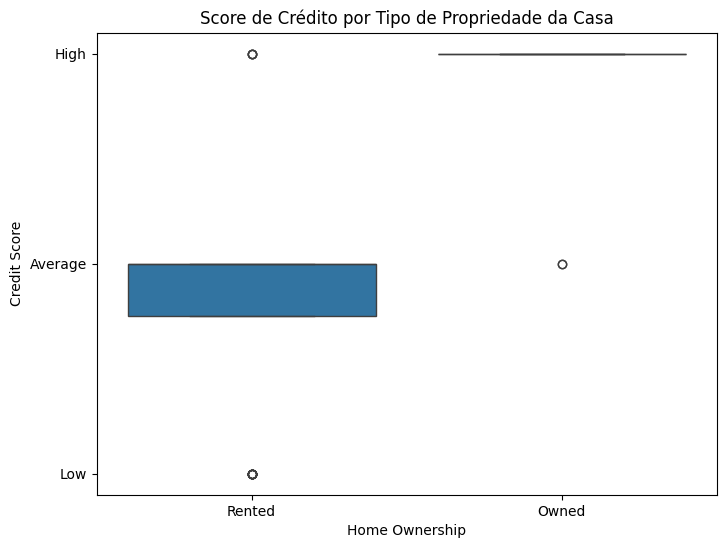

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Home Ownership', y='Credit Score', data=df)
plt.title('Score de Crédito por Tipo de Propriedade da Casa')
plt.show()

### 5. Quem já tem casa própria tende a ter um score mais alto

A análise entre tipo de propriedade da casa e score de crédito revela que:

- **Casa Própria e Score de Crédito:** Pessoas com casa própria têm uma probabilidade muito maior de ter um score de crédito alto.
- **Aluguel e Distribuição do Score:** Para aqueles que alugam, a distribuição do score de crédito tende a ser mais variada, com uma proporção menor de scores altos.
- **Clientes sem Casa Própria:** Indivíduos que não possuem casa própria podem ser considerados outliers, pois apresentam uma distribuição de score de crédito diferente, refletindo possivelmente um maior risco financeiro.


**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### 1. Existe alguma relação entre o número de filhos e o status de posse de casa (alugada ou própria)?

**Pergunta:** Será que o número de filhos influencia na decisão de ter uma casa própria ou alugada?

**Gráfico:** Um gráfico de barras ou gráfico de dispersão entre número de filhos e tipo de propriedade (alugada ou própria) pode mostrar se há alguma correlação entre ter mais filhos e a escolha de ter uma casa própria ou alugada.

---

### 2. A renda dos clientes está correlacionada com o nível educacional?

**Pergunta:** O nível de escolaridade afeta a renda dos clientes?

**Gráfico:** Gráfico de caixa (boxplot) para a variável renda em função de escolaridade pode revelar se clientes com maior nível educacional têm rendas mais altas em média.

---

### 3. A faixa etária tem alguma relação com o nível de escolaridade?

**Pergunta:** Existe algum padrão etário relacionado ao nível educacional dos clientes?

**Gráfico:** Um gráfico de dispersão ou gráfico de barras empilhadas entre faixa etária e nível educacional pode ajudar a visualizar como a distribuição dos níveis educacionais muda com a idade.


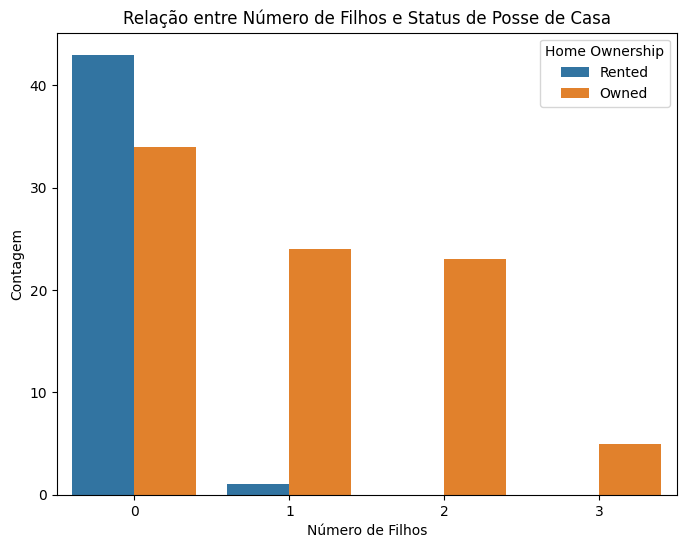

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of Children', hue='Home Ownership', data=df)
plt.title('Relação entre Número de Filhos e Status de Posse de Casa')
plt.xlabel('Número de Filhos')
plt.ylabel('Contagem')
plt.show()

### Clientes que alugam e o número de filhos

**Quem aluga tende a ter menos filhos,** com a grande maioria tendo apenas 1 filho, ou nenhum. Isso pode indicar uma maior mobilidade entre aqueles que alugam, sendo menos comum para pessoas com muitos filhos, que geralmente buscam estabilidade e maior espaço, características de quem possui uma casa própria.

---

### Posse de casa

**Para quem tem 2 ou mais filhos,** quase todos têm casa própria, sugerindo que esses clientes preferem maior estabilidade e espaço, o que está alinhado com a aquisição de um imóvel.

---

### Estabilidade na posse de casa

**A posse de casa é um forte indicador de estabilidade,** não só financeira, mas também familiar. Portanto, a tendência de pessoas com mais filhos optarem por casa própria está relacionada à necessidade de estabilidade e maior espaço para a família.


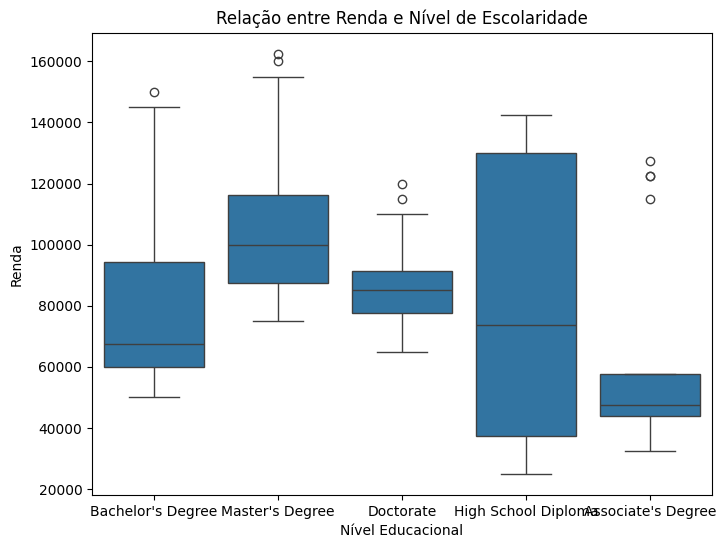

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Relação entre Renda e Nível de Escolaridade')
plt.xlabel('Nível Educacional')
plt.ylabel('Renda')
plt.show()

### Maior Escolaridade e Menor Intervalo de Renda

**Com o aumento do nível de escolaridade,** a renda tende a se concentrar mais, ou seja, o intervalo entre os valores de renda é menor. Isso pode ocorrer porque pessoas com níveis mais altos de escolaridade tendem a ocupar cargos mais bem remunerados, criando uma faixa salarial mais estreita, embora a renda média seja mais alta.

---

### Exceção do "Associate's Degree"

O grupo de pessoas com **diploma de Associate's Degree** apresenta a maior variação na renda, mas ainda assim tem uma renda média mais baixa se comparado aos outros grupos de escolaridade. Isso pode refletir o fato de que esse nível de escolaridade tende a estar associado a profissões que, em geral, não exigem um grau avançado de especialização, o que limita as opções de emprego e, consequentemente, a renda.

---

### Possíveis Explicações para Esses Padrões

- **Para os com maior escolaridade:** Como profissionais com pós-graduação ou doutorado tendem a estar em posições mais especializadas e com salários mais altos, o intervalo de renda é mais estreito, pois eles ocupam posições de alto nível em setores que pagam bem.
  
- **Para os com Associate's Degree:** O mercado de trabalho para pessoas com esse nível de educação é mais amplo e diversificado, mas muitas dessas profissões são de entrada ou médias, o que pode resultar em maior variação salarial.

---

### Insights

- **A educação tem um impacto significativo na renda.** No entanto, o impacto positivo da educação na renda parece ser mais forte nos níveis de Bachelor's Degree e Master's Degree.
  
- **O Associate's Degree é um caso à parte,** com uma renda média menor e maior dispersão, sugerindo que esse nível de educação oferece um espectro mais amplo de rendimentos, mas com um teto salarial mais baixo em geral.


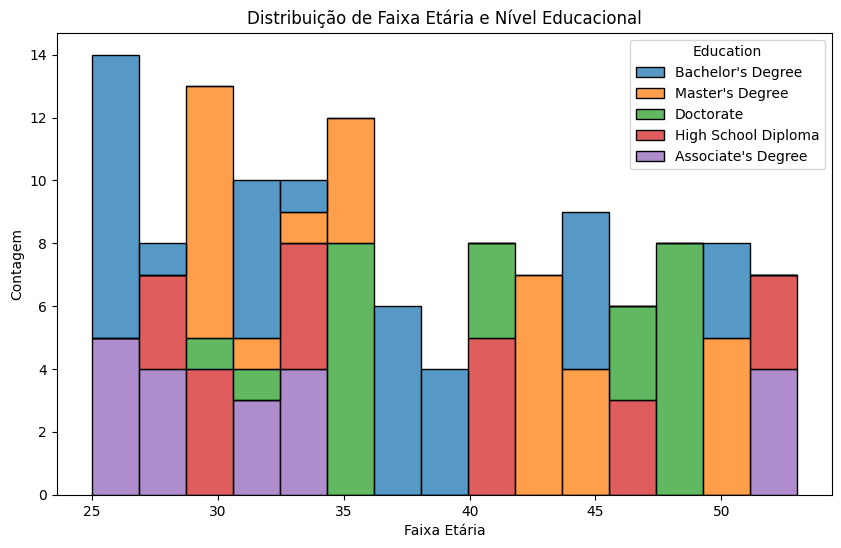

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Education", multiple="stack", bins=15)
plt.title('Distribuição de Faixa Etária e Nível Educacional')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()

### Análise da Relação Entre Idade e Nível Educacional

O gráfico mostra que **quanto maior o nível educacional, mais as faixas etárias avançadas se destacam.** Isso se deve ao tempo necessário para alcançar níveis mais altos de educação, como mestrado e doutorado, que geralmente demandam anos adicionais de estudo após a graduação. Esse padrão reforça a **relação natural entre idade e nível educacional.**


# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

Dicionário de mapeamento: {'Average': 0, 'High': 1, 'Low': 2}


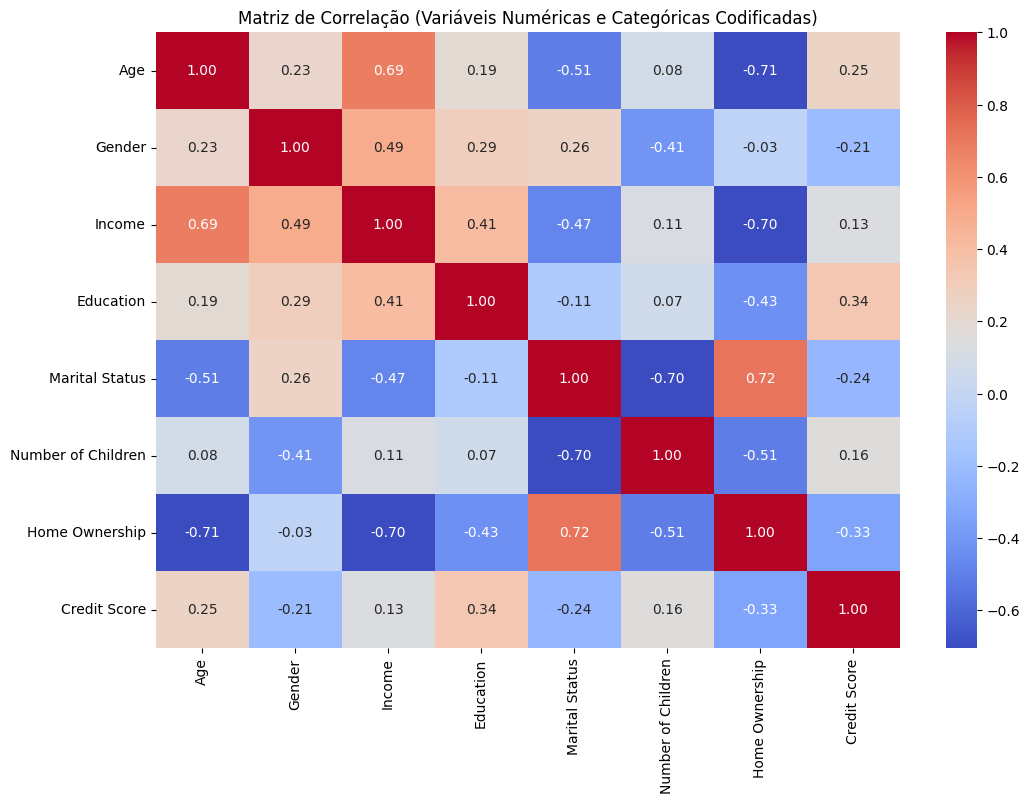

In [ ]:
# Cria uma cópia do dataframe para trabalhar
df_encoded = df.copy()

# Aplica Label Encoding para variáveis categóricas
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

#print(df_encoded['Credit Score'].unique())
# Criando um dicionário para mapear os valores codificados para os rótulos
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Dicionário de mapeamento:", label_mapping)

# Calcula a matriz de correlação com variáveis categóricas tratadas
correlation_matrix = df_encoded.corr()

# Plot da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Variáveis Numéricas e Categóricas Codificadas)")
plt.show()


### Insights sobre a Correlação entre Variáveis

- **Income e Age (0.69):**
  Existe uma **correlação moderada** entre renda e idade. Esse comportamento é esperado, pois, geralmente, pessoas mais velhas têm maior experiência profissional e estabilidade, o que pode levar a uma renda maior. Isso reforça a ideia de que **idade pode ser um bom indicador para estimar a renda** em modelos preditivos.

- **Income e Gender (0.49):**
  Há uma **correlação positiva** entre gênero e renda. Embora não seja muito alta, ela sugere uma possível **diferença de renda com base no gênero**, algo que pode ser relevante para investigações sobre desigualdade ou políticas específicas.

- **Education e Income (0.41):**
  A **correlação positiva** entre nível educacional e renda confirma uma tendência clara: **quanto maior o nível de escolaridade, maior a renda.** Isso é consistente com estudos que mostram que a educação impacta diretamente o potencial de ganhos ao longo da vida.

- **Home Ownership e Marital Status (não especificado):**
  A relação entre essas variáveis sugere que **pessoas casadas têm maior probabilidade de serem proprietárias de casa.** Isso pode estar relacionado a fatores como estabilidade financeira e o planejamento de longo prazo associado ao casamento.

- **Age e Marital Status (-0.51):**
  A **correlação negativa** indica que, à medida que a idade aumenta, a probabilidade de ser solteiro diminui. Essa relação reflete um **padrão demográfico comum**, no qual pessoas mais jovens são mais propensas a estarem solteiras.

- **Marital Status e Income (-0.47):**
  A **correlação negativa** aqui é interessante e pode indicar que **pessoas solteiras tendem a ter rendas mais altas.** Isso pode ser explicado por diferenças nas prioridades financeiras ou escolhas de carreira entre pessoas solteiras e casadas.

- **Number of Children e Marital Status (-0.7):**
  Essa **forte correlação negativa** reflete a realidade de que **a maioria das pessoas solteiras não tem filhos**, enquanto indivíduos casados são mais propensos a ter uma família maior.

- **Age e Home Ownership (-0.71):**
  A **idade parece estar fortemente correlacionada** com a propriedade de casa, sendo que pessoas mais velhas têm mais probabilidade de possuírem imóveis. Isso é consistente com o **acúmulo de patrimônio ao longo do tempo.**

- **Home Ownership e Income (-0.7):**
  A **correlação negativa** pode parecer contraintuitiva, mas pode estar associada a pessoas com rendas mais altas preferindo **alugar imóveis em regiões urbanas**, enquanto rendas moderadas investem na compra de casas.

- **Home Ownership e Number of Children (-0.51):**
  Isso sugere que **pessoas com mais filhos têm maior probabilidade de serem proprietárias de casa**, o que pode estar relacionado ao desejo por maior estabilidade ou espaço para a família.

### Variáveis com Baixa ou Nenhuma Correlação:
As demais combinações apresentam **correlação próxima de zero**, indicando pouca ou nenhuma relação linear entre elas. Esses pares de variáveis provavelmente não têm impacto significativo umas sobre as outras.


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

1. **Income e Age (0.69)**:
   - **Justificativa**: A correlação moderada entre renda e idade faz sentido, pois à medida que as pessoas envelhecem, elas geralmente acumulam mais experiência e, potencialmente, têm um avanço em suas carreiras, o que leva a uma renda maior. Além disso, pessoas mais velhas tendem a ter mais estabilidade financeira, o que é frequentemente refletido em uma renda mais alta. Esse padrão é consistente em muitos contextos demográficos e econômicos.

2. **Income e Gender (0.49)**:
   - **Justificativa**: Embora a correlação entre renda e gênero não seja extremamente alta, ela ainda sugere uma diferença relevante entre os gêneros no que diz respeito à renda. Em muitos contextos, essa diferença pode ser explicada pela disparidade salarial entre homens e mulheres, que ainda existe em várias áreas profissionais, refletindo desigualdades de gênero no mercado de trabalho.

3. **Education e Income (0.41)**:
   - **Justificativa**: A correlação entre nível educacional e renda é esperada e faz total sentido. Quanto maior o nível de escolaridade, mais qualificado um indivíduo tende a ser para cargos que exigem maior responsabilidade e, consequentemente, maior remuneração. O investimento em educação é frequentemente associado a um aumento potencial na capacidade de gerar renda.

4. **Age e Home Ownership (-0.71)**:
   - **Justificativa**: A correlação negativa entre idade e propriedade de imóvel também faz sentido. Pessoas mais velhas, com maior estabilidade financeira e mais tempo de acumulação de patrimônio, têm maior capacidade de comprar imóveis. Esse comportamento é típico, já que a maioria das pessoas adquire sua casa própria mais tarde na vida, quando já atingiram um certo nível de segurança financeira.

5. **Home Ownership e Income (-0.7)**:
   - **Justificativa**: A correlação negativa entre propriedade de casa e renda pode parecer contraintuitiva à primeira vista, mas faz sentido em certos contextos. Pessoas com rendas mais altas, especialmente em grandes centros urbanos, podem preferir alugar imóveis mais caros, enquanto pessoas com rendas moderadas ou mais baixas tendem a investir em imóveis próprios para garantir estabilidade a longo prazo.

6. **Number of Children e Marital Status (-0.7)**:
   - **Justificativa**: A forte correlação negativa entre número de filhos e estado civil é compreensível, pois a maioria das pessoas casadas tem filhos, enquanto a maior parte das pessoas solteiras, especialmente em faixas etárias mais jovens, tende a não ter filhos. O estado civil está diretamente relacionado à formação de famílias, e o número de filhos tende a ser maior entre casados.
   
Essas correlações fazem sentido porque refletem comportamentos demográficos e econômicos amplamente observados em estudos sociais e econômicos. Muitas dessas relações estão relacionadas a padrões de vida comuns: o aumento da idade, nível educacional e situação financeira geralmente influencia a estabilidade familiar e a acumulação de patrimônio. Por outro lado, a renda e o status de propriedade podem ser fatores econômicos que se interrelacionam de formas complexas.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [ ]:
#Feita uma copia no item A ja utilizando

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [ ]:
#Feito no item B

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [ ]:
# Separando as variáveis independentes (X) e dependente (y) usando df_encoded
X_encoded = df_encoded.drop('Credit Score', axis=1)  # Variáveis independentes (removendo a coluna 'Credit Score')
y_encoded = df_encoded['Credit Score']  # Variável dependente (target)

# Dividindo os dados em treino e teste, com 80% para treino e 20% para teste
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Verificando o tamanho das bases de treino e teste
print("Tamanho da base de treino (X_train_encoded):", X_train_encoded.shape)
print("Tamanho da base de teste (X_test_encoded):", X_test_encoded.shape)
print("Tamanho do target de treino (y_train_encoded):", y_train_encoded.shape)
print("Tamanho do target de teste (y_test_encoded):", y_test_encoded.shape)

Tamanho da base de treino (X_train_encoded): (104, 7)
Tamanho da base de teste (X_test_encoded): (26, 7)
Tamanho do target de treino (y_train_encoded): (104,)
Tamanho do target de teste (y_test_encoded): (26,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

Conteúdo de label_mapping:
{'Average': 0, 'High': 1, 'Low': 2}
Valores únicos antes do mapeamento:
[1 0 2]
Valores únicos após o mapeamento:
['High' 'Average' 'Low']


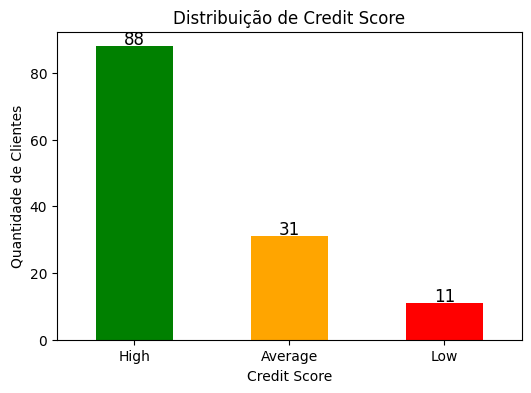

In [ ]:
# Verifique o conteúdo do mapeamento antes de usá-lo
print("Conteúdo de label_mapping:")
print(label_mapping)

# Verificar os valores únicos antes de aplicar o mapeamento
print("Valores únicos antes do mapeamento:")
print(df_encoded['Credit Score'].unique())

# Aplicar o mapeamento usando o reverse_label_mapping
df_encoded['Credit Score'] = df_encoded['Credit Score'].map(reverse_label_mapping)

# Verificar os valores únicos após o mapeamento
print("Valores únicos após o mapeamento:")
print(df_encoded['Credit Score'].unique())
df_encoded.to_csv('df_final_17.csv', index=False)


# Se a coluna de "Credit Score" estiver correta, plote a distribuição
if df_encoded['Credit Score'].isnull().sum() == 0:  # Verifica se não há valores nulos
    plt.figure(figsize=(6, 4))
    ax = df_encoded['Credit Score'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])

    # Adicionando os números acima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Distribuição de Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Existem valores nulos após o mapeamento.")



A análise da distribuição da coluna de **Credit Score** mostra que a classe **high** possui 88 observações, a classe **average** tem 31 observações e a classe **low** tem apenas 11 observações. Com isso, podemos observar que a coluna de **Credit Score** não está bem balanceada, já que há uma discrepância considerável no número de amostras entre as classes.

- **High**: 88 observações
- **Average**: 31 observações
- **Low**: 11 observações

Isso indica um desbalanceamento significativo, onde a classe **high** domina as outras. Esse desequilíbrio pode afetar a performance dos modelos de aprendizado de máquina, uma vez que o modelo pode tender a prever a classe majoritária (**high**) com maior frequência. Além disso, a classe **low** tem um número muito pequeno de observações, o que pode gerar dificuldades no aprendizado do modelo para identificar padrões corretos para essa classe.

A solução para esse desbalanceamento pode ser realizar o **balanceamento da classe Credit Score**, aplicando técnicas como **undersampling**, **oversampling** ou usando técnicas de ajuste de pesos durante o treinamento do modelo, como o **SMOTE** ou o **ajuste de pesos nas classes**.

Isso ajudará a melhorar a precisão do modelo nas classes com menor quantidade de dados e permitirá uma previsão mais equilibrada para todas as classes.


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [ ]:
from imblearn.over_sampling import SMOTE

# Verificar as classes do target (Credit Score) no conjunto de treino
print("Distribuição original de Credit Score no treino:")
print(y_train_encoded.value_counts())

# Aplicando o SMOTE no conjunto de treino
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train_encoded)

# Verificar as novas distribuições após o balanceamento
print("Distribuição de Credit Score no treino após o balanceamento:")
print(y_train_balanced.value_counts())

# Confirmar o balanceamento e tamanho das novas amostras
print(f"Tamanho do conjunto de treino balanceado X: {X_train_balanced.shape}")
print(f"Tamanho do conjunto de treino balanceado y: {y_train_balanced.shape}")


Distribuição original de Credit Score no treino:
Credit Score
1    73
0    23
2     8
Name: count, dtype: int64
Distribuição de Credit Score no treino após o balanceamento:
Credit Score
1    73
0    73
2    73
Name: count, dtype: int64
Tamanho do conjunto de treino balanceado X: (219, 7)
Tamanho do conjunto de treino balanceado y: (219,)


### Explicação:

**SMOTE**: A técnica cria amostras sintéticas das classes minoritárias (no caso, **low** e **average**) até que as distribuições fiquem balanceadas.

**Distribuição antes e depois**: Verificamos a distribuição das classes de **Credit Score** antes e depois de aplicar o **SMOTE** para garantir que o balanceamento foi feito corretamente.

**Novo conjunto de treino**: Após o balanceamento, as classes terão um número mais equilibrado de amostras, o que pode ajudar a melhorar a performance do modelo, especialmente para as classes minoritárias.
